In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/salaries/ds_salaries.csv


In [3]:
# importing data
data = pd.read_csv('/kaggle/input/salaries/ds_salaries.csv')

In [4]:
# Generate random values for each column
import random
num_rows_to_generate = 2000
output_file = '/kaggle/working/output'
random_data = pd.DataFrame(columns=data.columns)
for column in data.columns:
    values = random.choices(data[column].unique(), k=num_rows_to_generate)
    random_data[column] = values

# Concatenate original data with random data
generated_data = pd.concat([data, random_data])

# Write the generated data to a new CSV file
generated_data.to_csv(output_file, index=False)

print(f"Number of rows in the output file: {len(generated_data)}")

Number of rows in the output file: 5755


In [5]:
# display the first few rows of the dataset
print(generated_data.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [6]:
# Checking the rows and columns in dataset
generated_data.shape
# The dataset contians 11 columns and 3755 rows

(5755, 11)

In [7]:
# Looking at datatype, non-vnull value, 
## Meta data on columns
generated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5755 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5755 non-null   int64 
 1   experience_level    5755 non-null   object
 2   employment_type     5755 non-null   object
 3   job_title           5755 non-null   object
 4   salary              5755 non-null   int64 
 5   salary_currency     5755 non-null   object
 6   salary_in_usd       5755 non-null   int64 
 7   employee_residence  5755 non-null   object
 8   remote_ratio        5755 non-null   int64 
 9   company_location    5755 non-null   object
 10  company_size        5755 non-null   object
dtypes: int64(4), object(7)
memory usage: 539.5+ KB


In [8]:
generated_data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,5755.0,2022.074891,9.538100e-01,2020.0,2022.0,2022.0,2023.0,2023.0
salary,5755.0,246256.920070,1.133159e+06,6000.0,100000.0,140400.0,187500.0,30400000.0
salary_in_usd,5755.0,135361.674891,6.887643e+04,5132.0,85033.0,130000.0,178800.0,450000.0
remote_ratio,5755.0,47.506516,4.600237e+01,0.0,0.0,50.0,100.0,100.0


In [9]:
#Number of unique values in columns
generated_data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [10]:
generated_data.isnull().sum()
# Dataset has no null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
generated_data.duplicated().sum()
# Out of the Total Observation (3755) , 1171 values are duplicated. Duplicate values generally create bias 
# performance in train_test_spilt and modelling, so we should ideally drop this duplicates

1171

In [12]:
#remove duplicates
data =generated_data.drop_duplicates(keep="first")

In [13]:
data.duplicated().sum()


0

In [14]:
data.shape

(4584, 11)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[Text(2, 0, '276'),
 Text(2, 0, '227'),
 Text(2, 0, '199'),
 Text(2, 0, '105'),
 Text(2, 0, '46'),
 Text(2, 0, '44'),
 Text(2, 0, '35'),
 Text(2, 0, '34'),
 Text(2, 0, '25'),
 Text(2, 0, '22')]

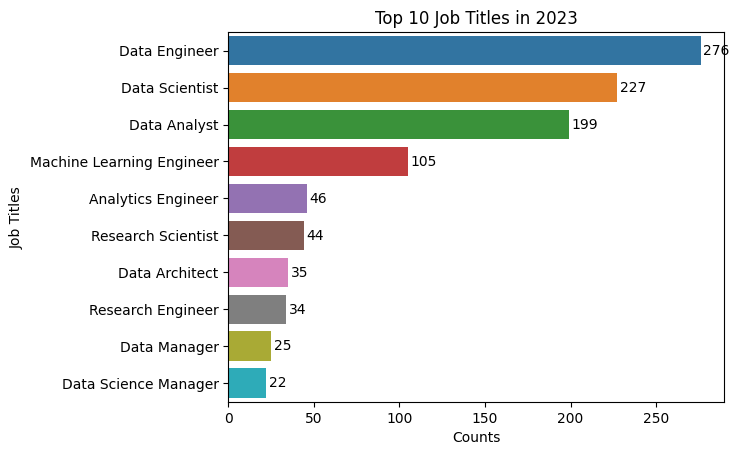

In [15]:
#top 10 job titles in 2023 using the bar plot.
import matplotlib.pyplot as plt
import seaborn as sns

jobs = data[data['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = jobs , y = jobs['index'], x = jobs.job_title)
ax.set(ylabel='Job Titles',xlabel='Counts', title='Top 10 Job Titles in 2023')
ax.bar_label(ax.containers[0], padding = 2)

In [16]:
quantiles=data.quantile(np.arange(0.1, 1, 0.1)).transpose()
quantiles

/tmp/ipykernel_33/3053531649.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles=data.quantile(np.arange(0.1, 1, 0.1)).transpose()


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
work_year,2020.0,2021.0,2022.0,2022.0,2022.0,2022.0,2023.0,2023.0,2023.0
salary,57000.0,83376.0,105380.0,124234.0,140000.0,159000.0,180000.0,204772.0,252840.0
salary_in_usd,45896.0,67000.0,90000.0,107580.0,126388.5,145000.0,165000.0,190000.0,226460.0
remote_ratio,0.0,0.0,0.0,0.0,50.0,100.0,100.0,100.0,100.0


In [17]:
data.remote_ratio.value_counts()

100    1867
0      1849
50      868
Name: remote_ratio, dtype: int64

In [18]:
data.work_year.value_counts()

2023    1655
2022    1644
2021     721
2020     564
Name: work_year, dtype: int64

In [ ]:
# work_year and remote_ratio are not numeric variables
# There are only two numeric variables in data
# 1. salary
# 2. salary_in_usd

In [19]:
quantiles=data[['salary','salary_in_usd']].quantile(np.arange(0.1, 1, 0.1)).transpose()
quantiles

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
salary,57000.0,83376.0,105380.0,124234.0,140000.0,159000.0,180000.0,204772.0,252840.0
salary_in_usd,45896.0,67000.0,90000.0,107580.0,126388.5,145000.0,165000.0,190000.0,226460.0


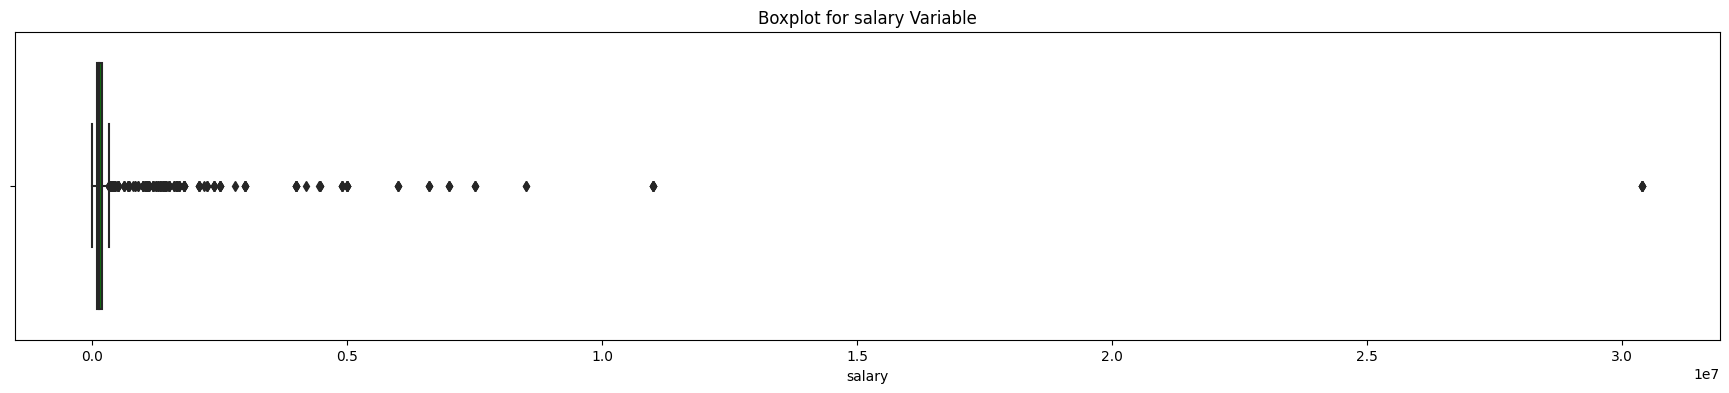

In [20]:
plt.figure(figsize=[22,4])
sns.boxplot(x = 'salary', data = data,color='green')
plt.title('Boxplot for salary Variable')
plt.show()

# We see that the salary variable consist of many outliers , 
# but this outliers are not actual outliers becuase the salary varibale is salaries in differnt 
# currencies which is standardized in our next variables 'salary_in_usd'. So we need not treat any outlier. 
# And keeping this variables as it is and not useful for modelling becuase it wont be able to explain much 
# in salary variation. Instead we will be using the currency in which salary is given

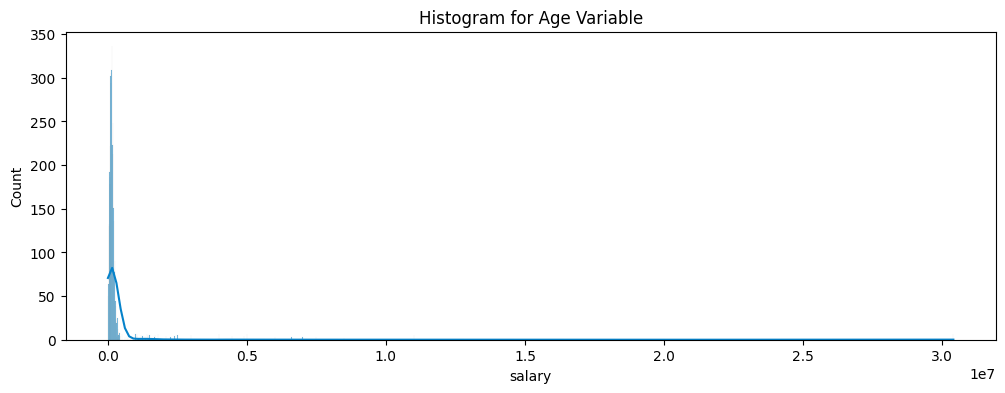

In [21]:
plt.figure(figsize=[12,4])
sns.histplot(data = data['salary'], kde = True,color='#0582ca')
plt.title('Histogram for Age Variable')
plt.show()

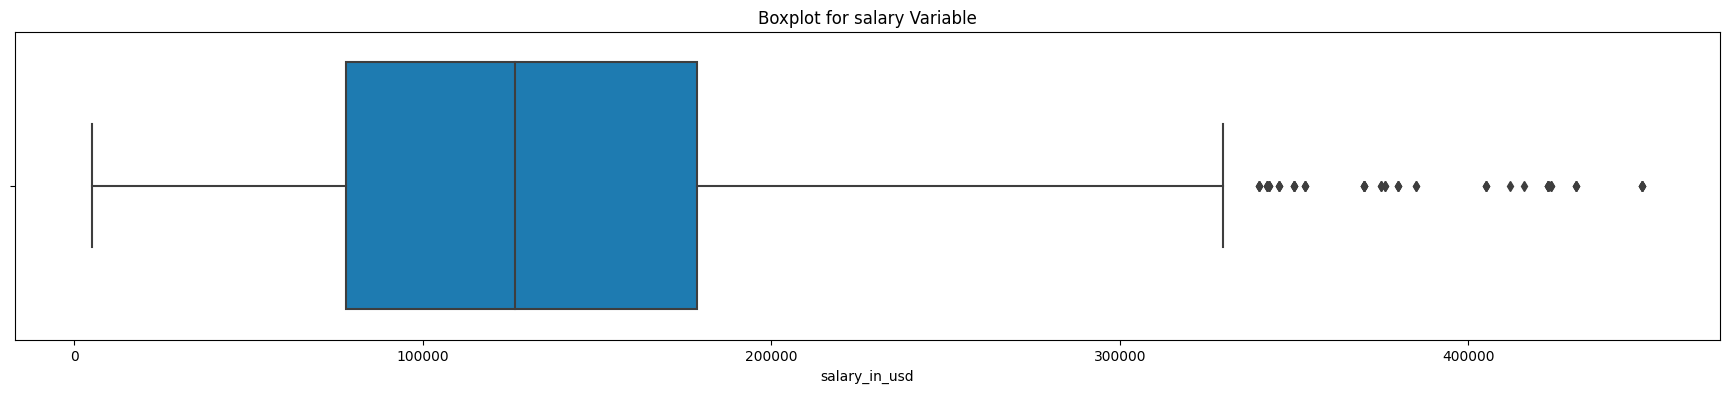

In [22]:
plt.figure(figsize=[22,4])
sns.boxplot(x = 'salary_in_usd', data = data,color='#0582ca')
plt.title('Boxplot for salary Variable')
plt.show()

# We observe that there are some outliers in our 'salary_in_usd' variable.
# But these are actual variantion in the salary. There might be people with such salary. 
# Hence we wont treat our outliers 

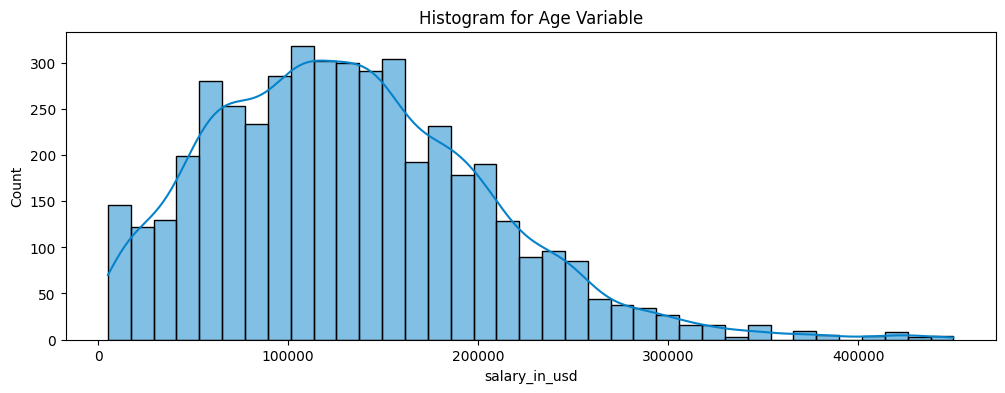

In [23]:
plt.figure(figsize=[12,4])
sns.histplot(data = data['salary_in_usd'], kde = True,color='#0582ca')
plt.title('Histogram for Age Variable')
plt.show()

# We see that salary_in_usd  is right skewed
# Mean > Median> Mode
# 75 percentile of data scientist recieve salary lesser than 175000 USD and 25 percentile recieve greater than 175000 USD

In [24]:
data['salary_in_usd'].describe()

count      4584.000000
mean     132451.833551
std       72314.121373
min        5132.000000
25%       78000.000000
50%      126388.500000
75%      178800.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [25]:
print("Mean of salary_in_usd :",data.salary_in_usd.mean(),
     "\nMedian of salary_in_usd :",data.salary_in_usd.median(),
     "\nMode of salary_in_usd :",data.salary_in_usd.mode())

Mean of salary_in_usd : 132451.83355148343 
Median of salary_in_usd : 126388.5 
Mode of salary_in_usd : 0    100000
Name: salary_in_usd, dtype: int64


In [26]:
data[['work_year', 'experience_level', 'employment_type', 'job_title',
        'salary_currency', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']].nunique()

work_year              4
experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
remote_ratio           3
company_location      72
company_size           3
dtype: int64

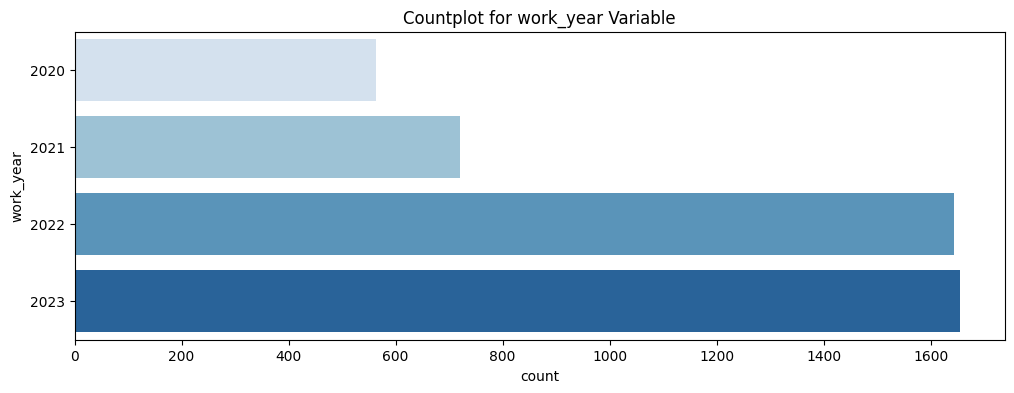

In [27]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['work_year'],palette='Blues')
plt.title('Countplot for work_year Variable')
plt.show()

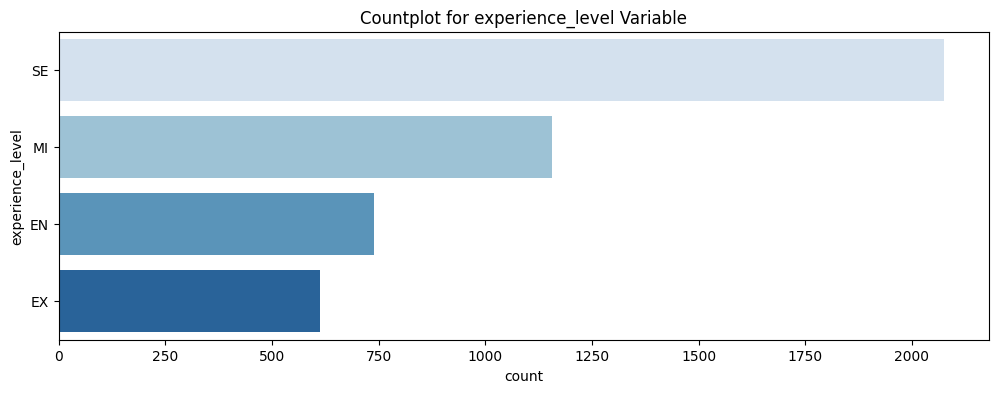

In [28]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['experience_level'],palette='Blues')
plt.title('Countplot for experience_level Variable')
plt.show()

# 1. The are more number of senior employees  : SE
# 2. The second highest is Mid level experince : MI
# 3. The third is ENtry level : EN
# 4. The least are experts : EX


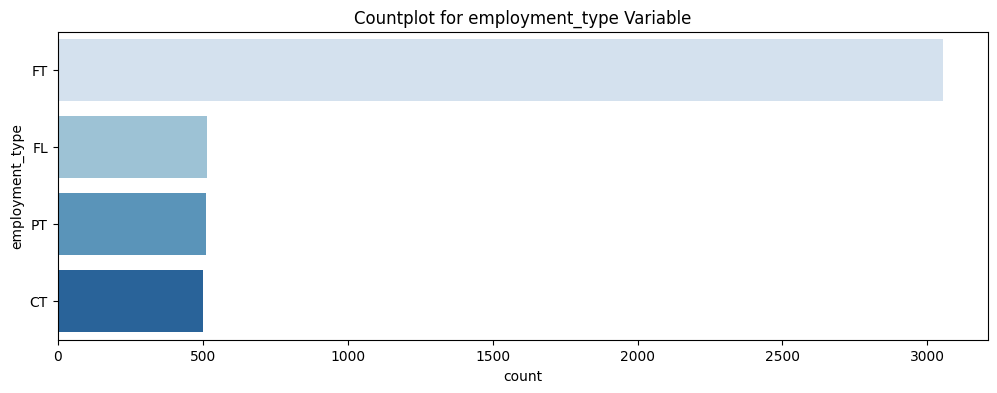

In [29]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['employment_type'],order = data['employment_type'].value_counts().index,palette='Blues')
plt.title('Countplot for employment_type Variable')
plt.show()

# We can observe that there more number of Full time Employees compared to other types of employement

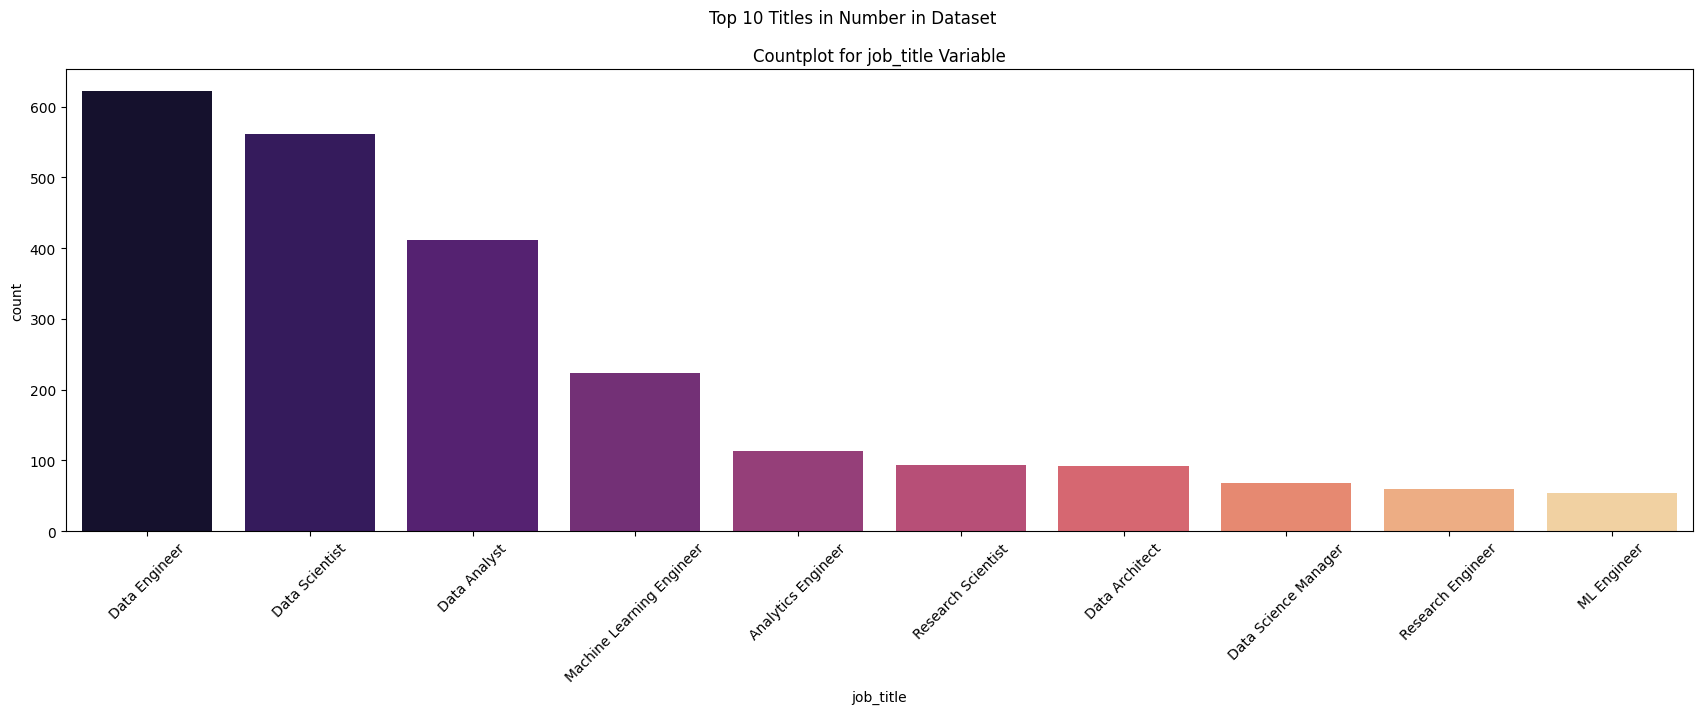

In [30]:
plt.figure(figsize=[21,6])
sns.countplot(x = data['job_title'],order=data['job_title'].value_counts().iloc[:10].index,palette='magma')
plt.title('Countplot for job_title Variable')
plt.xticks(rotation = 45)
plt.suptitle("Top 10 Titles in Number in Dataset")
plt.show()

# There are more number of Data Engineers in our Dataset compared to Data Scientist, 
# Data Analyst, and other job_titled employees

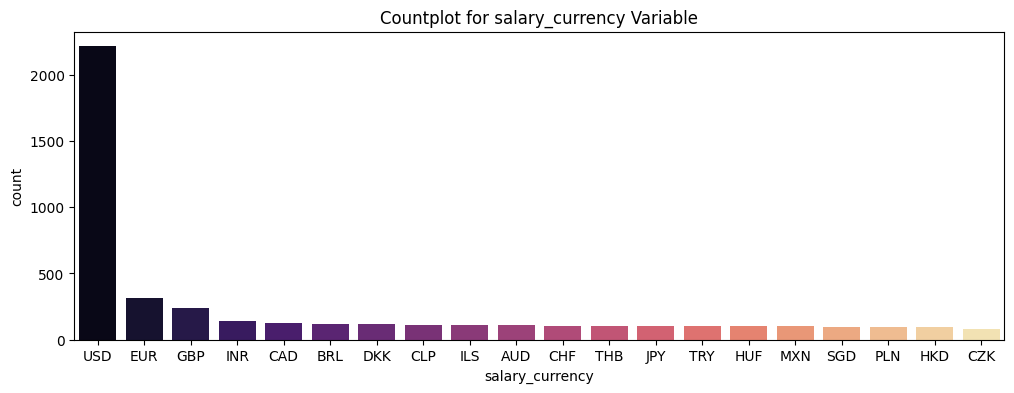

In [31]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['salary_currency'],order=data['salary_currency'].value_counts().index,palette='magma')
plt.title('Countplot for salary_currency Variable')
plt.show()

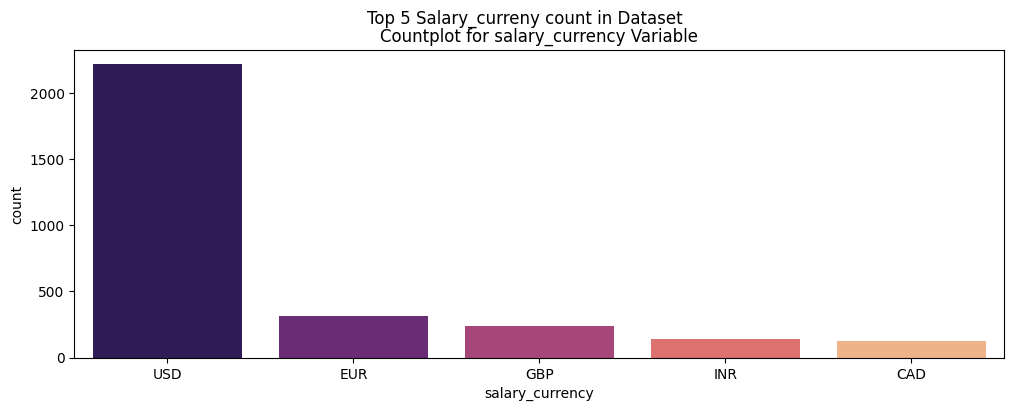

In [32]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['salary_currency'],order=data['salary_currency'].value_counts().iloc[:5].index,palette='magma')
plt.title('Countplot for salary_currency Variable')
plt.suptitle("Top 5 Salary_curreny count in Dataset")
plt.show()

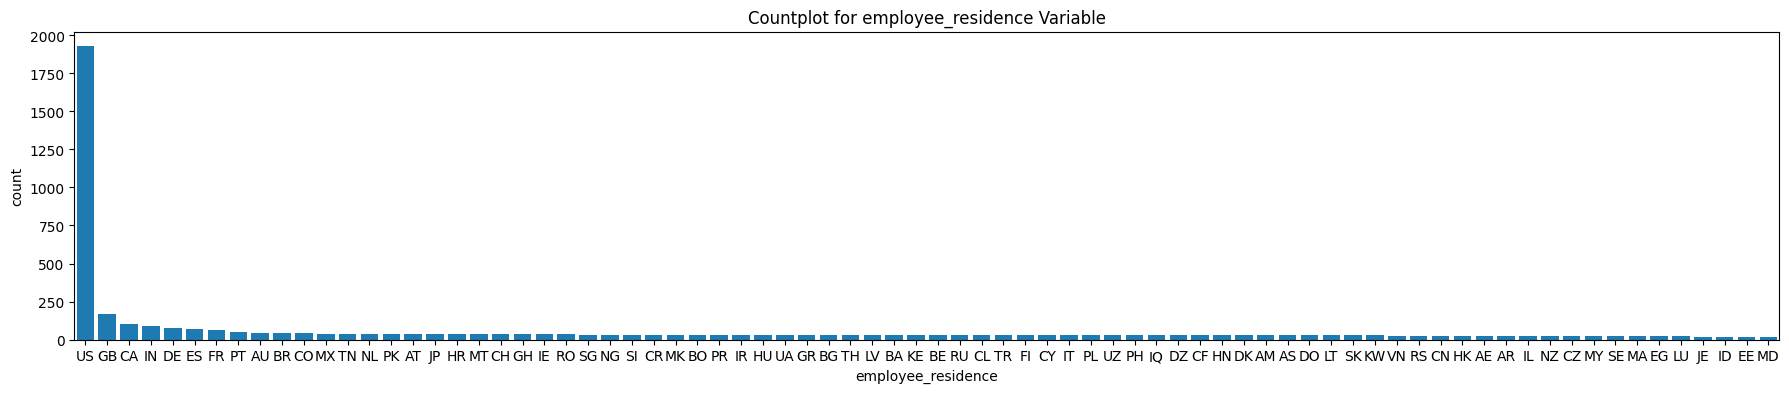

In [33]:
plt.figure(figsize=[22,4])
sns.countplot(x = data['employee_residence'],order = data['employee_residence'].value_counts().index,color='#0582ca')
plt.title('Countplot for employee_residence Variable')
plt.show()

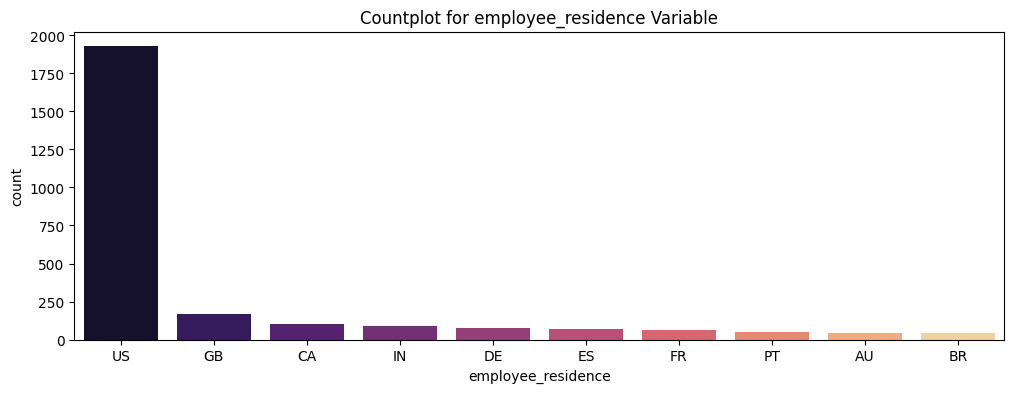

In [34]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['employee_residence'],order = data['employee_residence'].value_counts().iloc[:10].index,palette='magma')
plt.title('Countplot for employee_residence Variable')
plt.show()

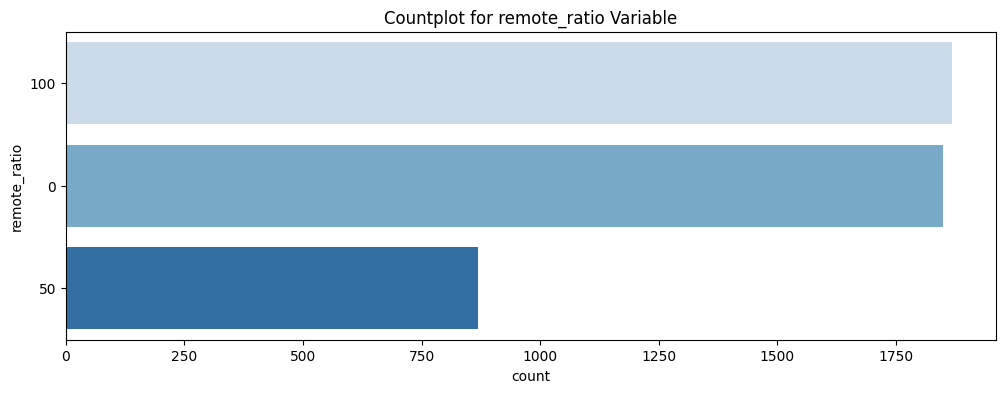

In [35]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['remote_ratio'],order =  data['remote_ratio'].value_counts().index,palette='Blues')
plt.title('Countplot for remote_ratio Variable')
plt.show()

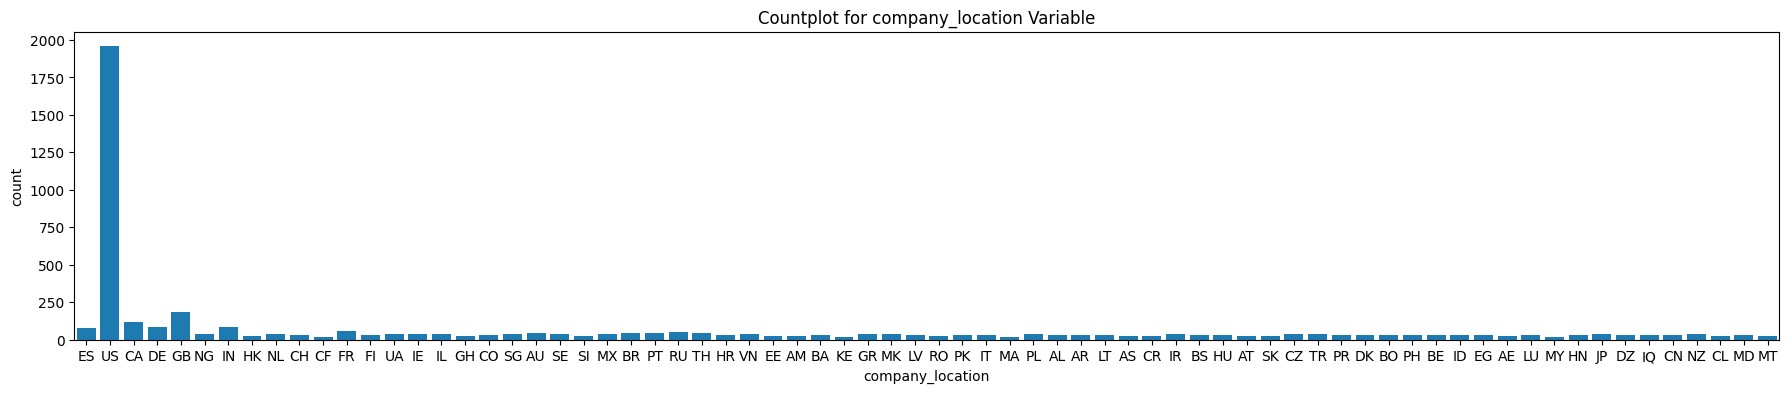

In [36]:
plt.figure(figsize=[22,4])
sns.countplot(x = data['company_location'],color='#0582ca')
plt.title('Countplot for company_location Variable')
plt.show()

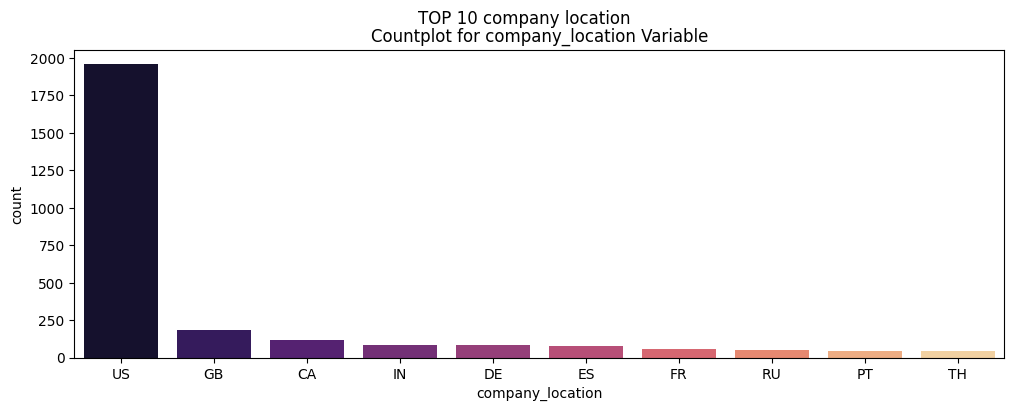

In [37]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_location'],order = data['company_location'].value_counts().iloc[:10].index,palette='magma')
plt.title('Countplot for company_location Variable')
plt.suptitle("TOP 10 company location")
plt.show()

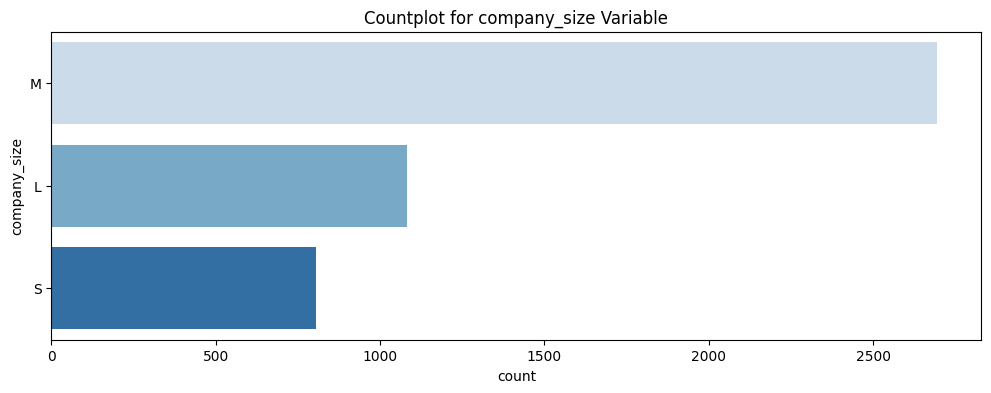

In [38]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['company_size'],order=data['company_size'].value_counts().index,palette='Blues')
plt.title('Countplot for company_size Variable')
plt.show()

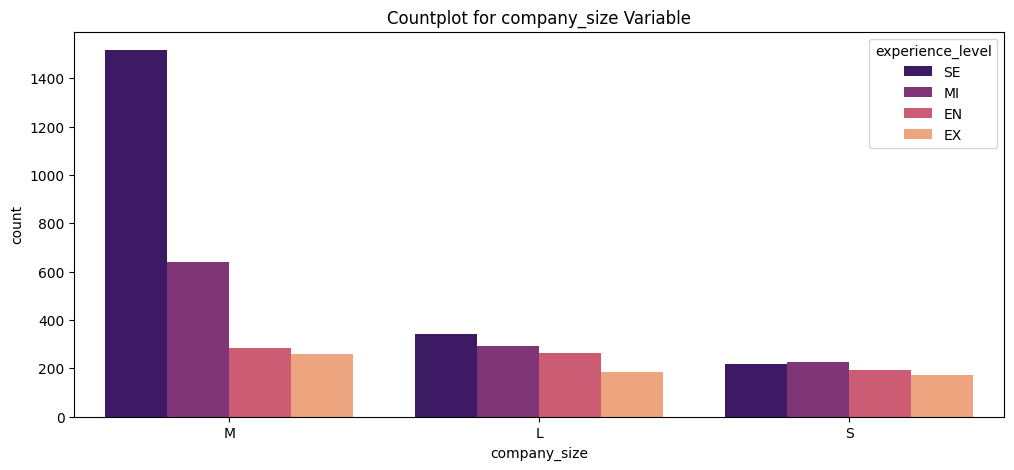

In [39]:
plt.figure(figsize=[12,5])
sns.countplot(x = data['company_size'],hue=data['experience_level'],order=data['company_size'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

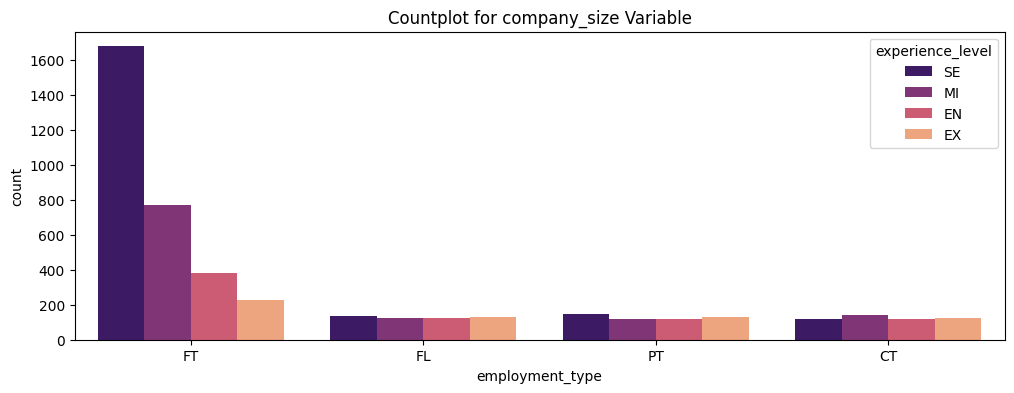

In [40]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['employment_type'],hue=data['experience_level'],order=data['employment_type'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

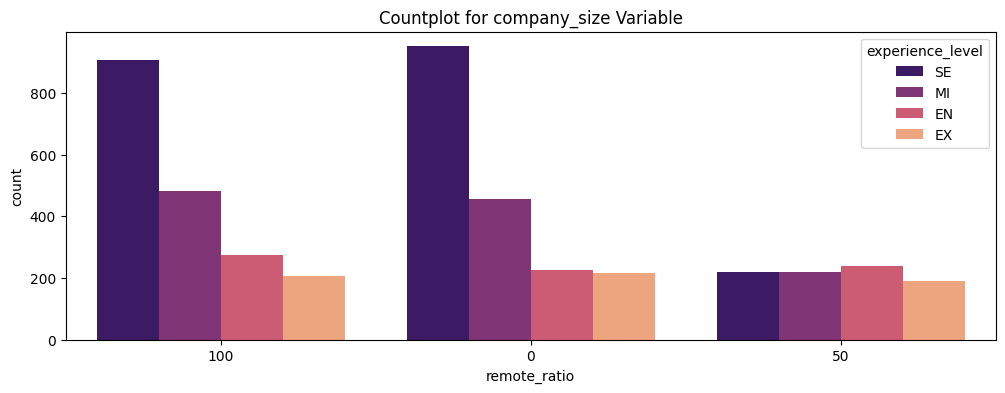

In [41]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['remote_ratio'],hue=data['experience_level'],order=data['remote_ratio'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

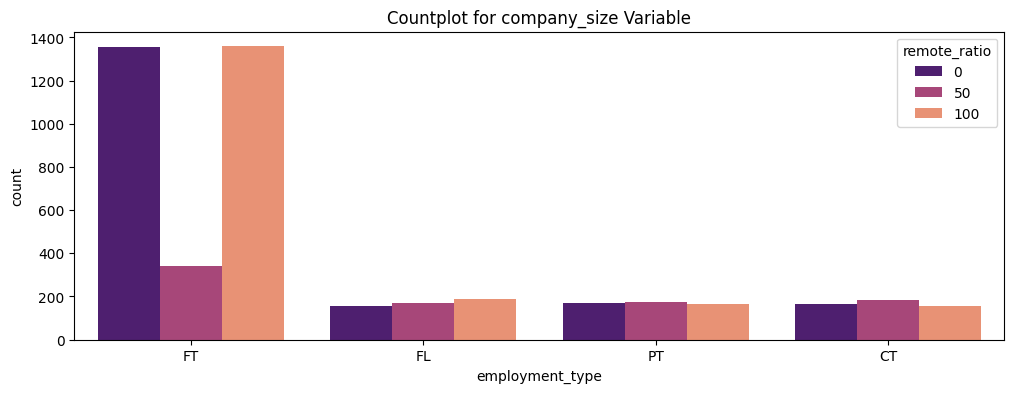

In [42]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['employment_type'],hue=data['remote_ratio'],order=data['employment_type'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

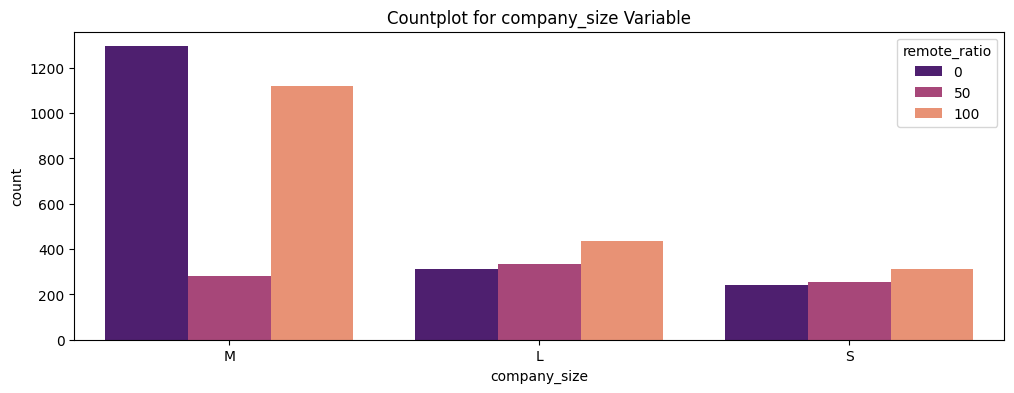

In [43]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_size'],hue=data['remote_ratio'],order=data['company_size'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

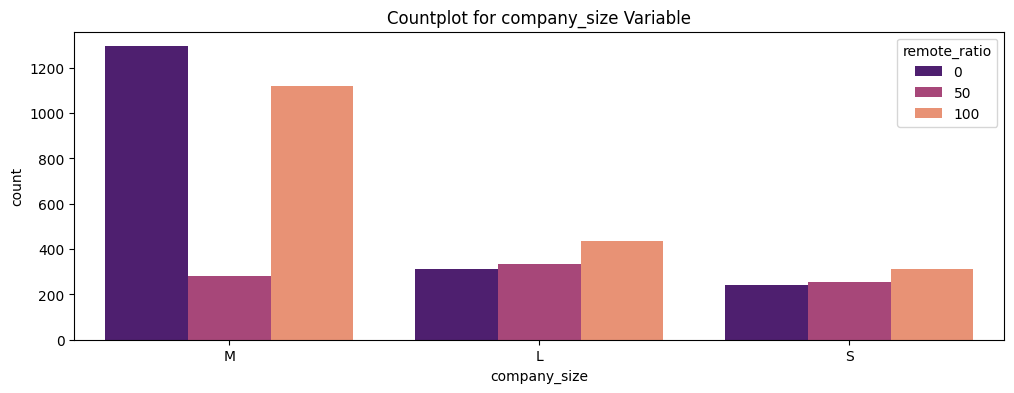

In [44]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_size'],hue=data['remote_ratio'],order=data['company_size'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

In [45]:
dumm=['experience_level','employment_type','company_size']
data[dumm].astype(str)

,experience_level,employment_type,company_size
0,SE,FT,L
1,MI,CT,S
2,MI,CT,S
3,SE,FT,M
4,SE,FT,M
...,...,...,...
1995,SE,FT,L
1996,EX,FT,L
1997,SE,PT,L
1998,SE,FL,S


In [46]:
data =pd.get_dummies(data,columns=['experience_level'],prefix= 'experience_level',drop_first=True)
data =pd.get_dummies(data,columns=['employment_type'],prefix= 'employment_type',drop_first=True)
data =pd.get_dummies(data,columns=['company_size'],prefix= 'company_size',drop_first=True)

In [47]:
data['work_year'].value_counts()

2023    1655
2022    1644
2021     721
2020     564
Name: work_year, dtype: int64

In [48]:
data =pd.get_dummies(data,columns=['work_year'],prefix= 'work_year_',drop_first=True)


In [49]:
data.head()

# The variables with lots of categories in it 
# ['company_location','employee_residence','salary_currency','job_title']

,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,work_year__2021,work_year__2022,work_year__2023
0,Principal Data Scientist,80000,EUR,85847,ES,100,ES,0,0,1,0,1,0,0,0,0,0,1
1,ML Engineer,30000,USD,30000,US,100,US,0,1,0,0,0,0,0,1,0,0,1
2,ML Engineer,25500,USD,25500,US,100,US,0,1,0,0,0,0,0,1,0,0,1
3,Data Scientist,175000,USD,175000,CA,100,CA,0,0,1,0,1,0,1,0,0,0,1
4,Data Scientist,120000,USD,120000,CA,100,CA,0,0,1,0,1,0,1,0,0,0,1


In [50]:
data['company_location'].value_counts()

US    1957
GB     181
CA     115
IN      86
DE      83
      ... 
RO      24
MY      20
MA      19
KE      19
CF      18
Name: company_location, Length: 72, dtype: int64

In [51]:
data['company_location'] = np.where(data['company_location']=="US",1,0)
data.rename(columns={'company_location':'company_location_US'},inplace=True)
data['employee_residence'].value_counts()

US    1928
GB     167
CA     101
IN      91
DE      76
      ... 
LU      21
JE      20
ID      20
EE      17
MD      16
Name: employee_residence, Length: 78, dtype: int64

In [52]:
data['employee_residence'] = np.where(data['employee_residence']=="US",1,0)
data.rename(columns={'employee_residence':'employee_residence_US'},inplace=True)
data['salary_currency'].value_counts()

USD    2214
EUR     316
GBP     237
INR     139
CAD     126
BRL     121
DKK     115
CLP     113
ILS     112
AUD     109
CHF     104
THB     104
JPY     104
TRY     103
HUF     102
MXN     101
SGD      96
PLN      94
HKD      93
CZK      81
Name: salary_currency, dtype: int64

In [53]:
data['salary_currency'] = np.where(data['salary_currency']=="USD",1,0)
data.rename(columns={'salary_currency':'salary_currency_USD'},inplace=True)
data['job_title'].value_counts()

Data Engineer                         622
Data Scientist                        561
Data Analyst                          411
Machine Learning Engineer             223
Analytics Engineer                    113
                                     ... 
Cloud Data Engineer                    17
Cloud Data Architect                   16
Principal Data Architect               15
Machine Learning Research Engineer     14
Data Modeler                           13
Name: job_title, Length: 93, dtype: int64

In [54]:
data['job_title'] = np.where(data['job_title']=="Data Engineer",data['job_title'],
                            np.where(data['job_title']=="Data Scientist",data['job_title'],
                              np.where(data['job_title']=="Data Analyst",data['job_title'],
                                      np.where(data['job_title']=="Machine Learning Engineer",data['job_title'],"Other"))))
data['job_title'].value_counts()

Other                        2767
Data Engineer                 622
Data Scientist                561
Data Analyst                  411
Machine Learning Engineer     223
Name: job_title, dtype: int64

In [55]:
data =pd.get_dummies(data,columns=['job_title'],prefix= 'company_size',drop_first=True)

In [56]:
data.head()

,salary,salary_currency_USD,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,...,employment_type_PT,company_size_M,company_size_S,work_year__2021,work_year__2022,work_year__2023,company_size_Data Engineer,company_size_Data Scientist,company_size_Machine Learning Engineer,company_size_Other
0,80000,0,85847,0,100,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,30000,1,30000,1,100,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,25500,1,25500,1,100,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,175000,1,175000,0,100,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,120000,1,120000,0,100,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4584 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   salary                                  4584 non-null   int64
 1   salary_currency_USD                     4584 non-null   int64
 2   salary_in_usd                           4584 non-null   int64
 3   employee_residence_US                   4584 non-null   int64
 4   remote_ratio                            4584 non-null   int64
 5   company_location_US                     4584 non-null   int64
 6   experience_level_EX                     4584 non-null   uint8
 7   experience_level_MI                     4584 non-null   uint8
 8   experience_level_SE                     4584 non-null   uint8
 9   employment_type_FL                      4584 non-null   uint8
 10  employment_type_FT                      4584 non-null   uint8
 11  employment_type_P

In [58]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,4584.0,271538.095332,1.268126e+06,6000.0,97000.0,140000.0,192400.0,30400000.0
salary_currency_USD,4584.0,0.482984,4.997649e-01,0.0,0.0,0.0,1.0,1.0
salary_in_usd,4584.0,132451.833551,7.231412e+04,5132.0,78000.0,126388.5,178800.0,450000.0
employee_residence_US,4584.0,0.420593,4.937082e-01,0.0,0.0,0.0,1.0,1.0
remote_ratio,4584.0,50.196335,4.502242e+01,0.0,0.0,50.0,100.0,100.0
company_location_US,4584.0,0.426920,4.946844e-01,0.0,0.0,0.0,1.0,1.0
experience_level_EX,4584.0,0.133726,3.403948e-01,0.0,0.0,0.0,0.0,1.0
experience_level_MI,4584.0,0.252182,4.343123e-01,0.0,0.0,0.0,1.0,1.0
experience_level_SE,4584.0,0.452880,4.978290e-01,0.0,0.0,0.0,1.0,1.0
employment_type_FL,4584.0,0.112129,3.155597e-01,0.0,0.0,0.0,0.0,1.0


In [59]:
data.shape

(4584, 21)

In [60]:
data.nunique()

salary                                     815
salary_currency_USD                          2
salary_in_usd                             1035
employee_residence_US                        2
remote_ratio                                 3
company_location_US                          2
experience_level_EX                          2
experience_level_MI                          2
experience_level_SE                          2
employment_type_FL                           2
employment_type_FT                           2
employment_type_PT                           2
company_size_M                               2
company_size_S                               2
work_year__2021                              2
work_year__2022                              2
work_year__2023                              2
company_size_Data Engineer                   2
company_size_Data Scientist                  2
company_size_Machine Learning Engineer       2
company_size_Other                           2
dtype: int64

In [61]:
# - we dont need it becuase we have salary which is standardized in US currency
data.drop(columns=['salary'],inplace=True, axis=1)

In [62]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=2000):
        # init parameters
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def _init_params(self):
        self.weights = np.zeros(self.n_features)
        self.bias = 0
    
    def _update_params(self, dw, db):
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
    
    def _get_prediction(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def _get_gradients(self, X, y, y_pred):
        # get distance between y_pred and y_true
        error = y_pred - y
        # compute the gradients of weight & bias
        dw = (1 / self.n_samples) * np.dot(X.T, error)
        db = (1 / self.n_samples) * np.sum(error)
        return dw, db
    
    def fit(self, X, y):
        # get number of samples & features
        self.n_samples, self.n_features = X.shape
        # init weights & bias
        self._init_params()

        # perform gradient descent for n iterations
        for _ in range(self.n_iters):
            # get y_prediction
            y_pred = self._get_prediction(X)
            # compute gradients
            dw, db = self._get_gradients(X, y, y_pred)
            # update weights & bias with gradients
            self._update_params(dw, db)
    
    def predict(self, X):
        y_pred = self._get_prediction(X)
        return y_pred

In [63]:
data.columns

Index(['salary_currency_USD', 'salary_in_usd', 'employee_residence_US',
       'remote_ratio', 'company_location_US', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'company_size_M',
       'company_size_S', 'work_year__2021', 'work_year__2022',
       'work_year__2023', 'company_size_Data Engineer',
       'company_size_Data Scientist', 'company_size_Machine Learning Engineer',
       'company_size_Other'],
      dtype='object')

In [64]:
X=data[['experience_level_EX','experience_level_MI', 'experience_level_SE']]

y=data['salary_in_usd']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

print('X_train.shape : ',X_train.shape,'\nX_test.shape  : ',X_test.shape,'\ny_train.shape : ',y_train.shape,'\ny_test.shape  : ',y_test.shape )

X_train.shape :  (3208, 3) 
X_test.shape  :  (1376, 3) 
y_train.shape :  (3208,) 
y_test.shape  :  (1376,)


In [74]:
# define helper function to evaluate 
# Root Mean Square Error ==> 
# one of the most commonly used measures for evaluating the quality of predictions
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred - y_true)**2))

# instantiate regressor and fit
linreg = LinearRegression(learning_rate=0.01, n_iters=800)
linreg.fit(X_train, y_train)

# make prediction

predictions = linreg.predict(X_test)
rmse = rmse(y_test, predictions)

print(f"RMSE: ", rmse)


RMSE:  68926.99028810524
